In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/telco_customer_churn.csv")

# Data Validation

Start by visualizing data and matching types.

In [ ]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Understanding the reason for TotalCharges to be an object even tough it seems to be a float in the **head()** function.

In [ ]:
# The error message points to the presence of empty spaces as null
dataframe["TotalCharges"] = dataframe["TotalCharges"].astype("float64")

ValueError: ignored

In [ ]:
# Replaces null values and type cast column
dataframe["TotalCharges"] = dataframe["TotalCharges"].replace(' ', np.nan)
dataframe["TotalCharges"] = dataframe["TotalCharges"].astype("float64")

In [ ]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Verifies for missing values.

In [ ]:
dataframe.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Fills missing values with linear interpolation
dataframe.interpolate(inplace=True)
dataframe.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Analysis

Let's start analysing the distribution of our data. This visualization is also useful to validate that the values are within the specified by the dataset provider, in other words that there are no invalid values.

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

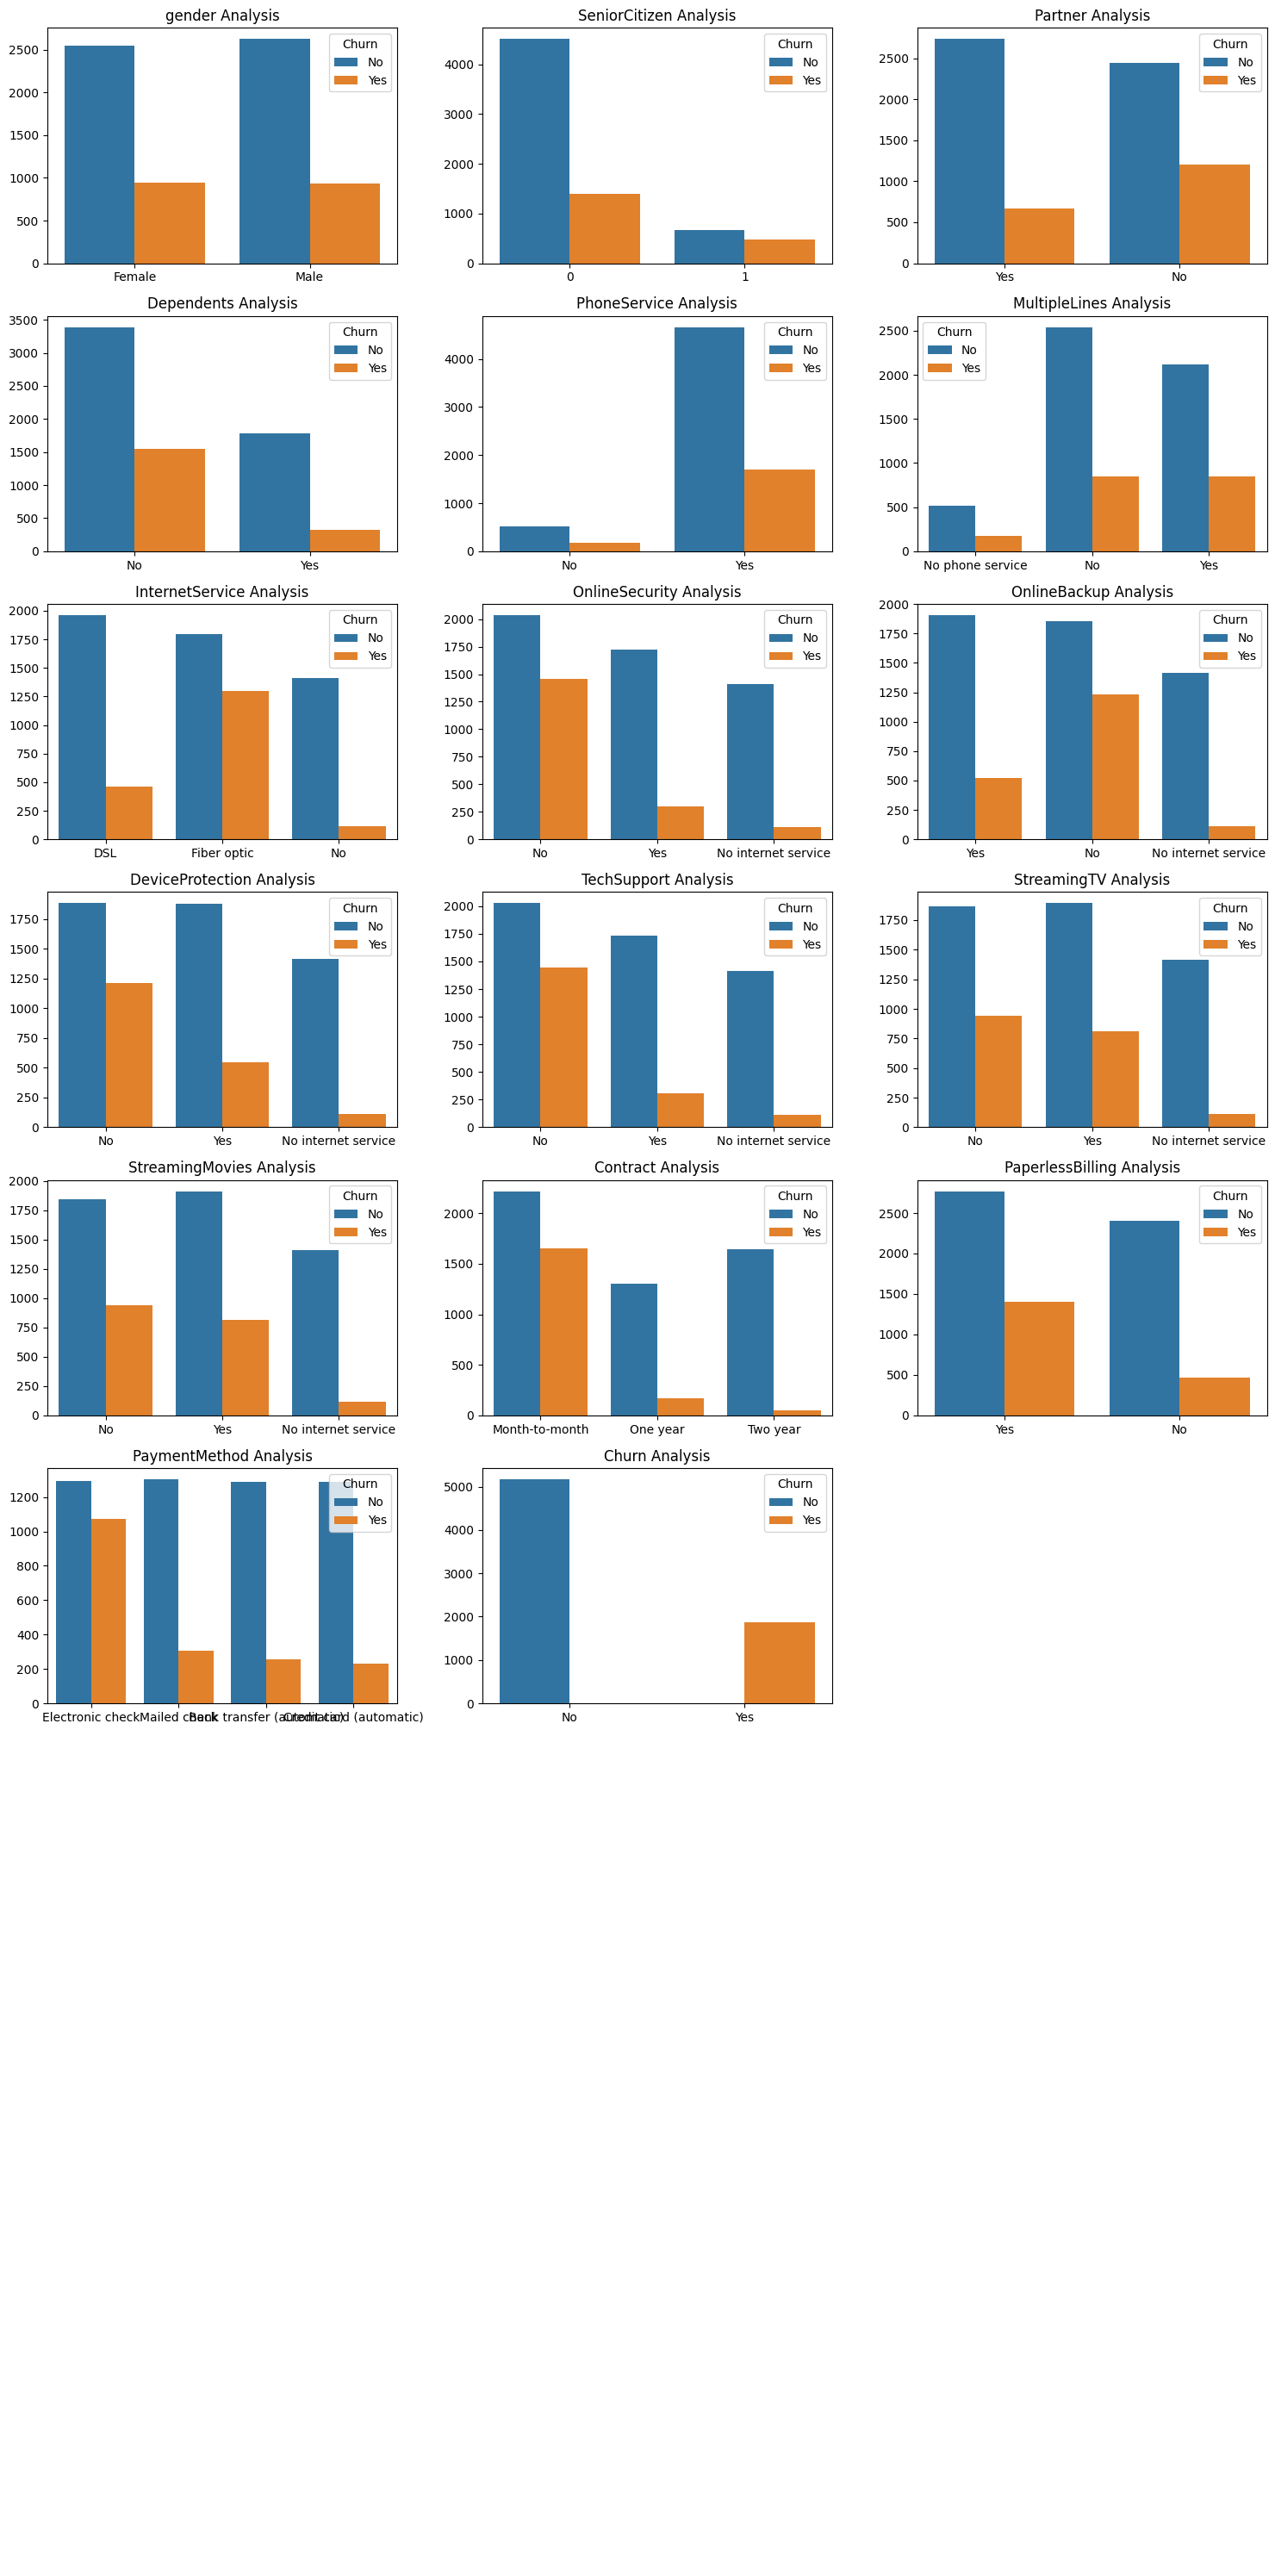

In [ ]:
# Drops customerID because it is irrelevant
# Drops other columns because they are numeric and doesn't make sense to count them now
data_to_analyze = dataframe.drop(["customerID", "tenure", "MonthlyCharges", "TotalCharges"], axis="columns")

columns = data_to_analyze.columns
ncols = 3
nrows = math.ceil(len(columns)/2)
_, axes = plt.subplots(nrows, ncols, figsize=(15, 30))
for index, axis in enumerate(axes.reshape(-1)):
    if index < len(columns):
        plot = sns.countplot(x=data_to_analyze[columns[index]], hue=dataframe["Churn"], ax=axis)
        plot.set_title(f"{columns[index]} Analysis")
        plot.set_ylabel("")
        plot.set_xlabel("")
    else:  # If number of plots is odd, don't print the last one since it's expecting an even number of plots
        axis.axis('off')

plt.tight_layout()  # adjusting the spacing between subplots
plt.show()  # displaying the final figure

The remaining columns (tenure, MonthlyCharges, and TotalCharges) can also provide us useful data, mainly if we want to analyze how much a client has spent using the company's services over the time.

In [ ]:
data_to_analyze = dataframe[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]]
data_to_analyze = data_to_analyze.sort_values(by="tenure")
data_to_analyze = data_to_analyze.reset_index()
data_to_analyze = data_to_analyze.drop("index", axis="columns")

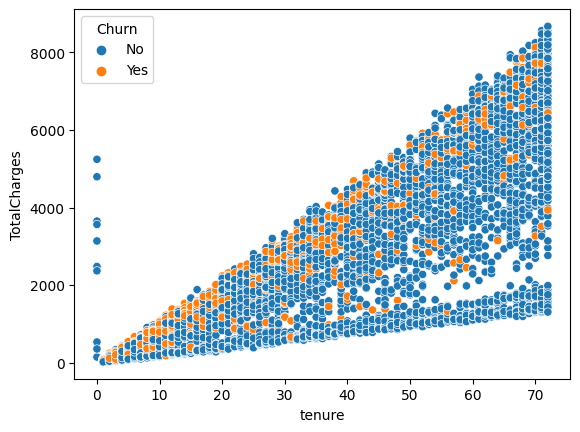

In [ ]:
plot = sns.scatterplot(x=data_to_analyze["tenure"], y=data_to_analyze["TotalCharges"], hue=data_to_analyze["Churn"])
plt.show()

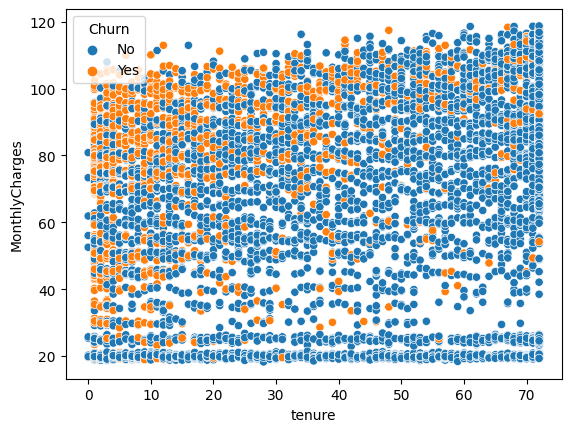

In [ ]:
plot = sns.scatterplot(x=data_to_analyze["tenure"], y=data_to_analyze["MonthlyCharges"], hue=data_to_analyze["Churn"])
plt.show()

The first graph indicates that people tend to cancel the services in the first 20 months. The same statement can be done observing the second graph, but the second one indicates one more topic: after 20 months, the people who tend to cancel pay higher charges, so diving a discount for these users might be an option to lower the churn rate.

Let's take a batter look at the numerical columns' distribution.
The mean will be represented by the red line and the median by the green line.

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


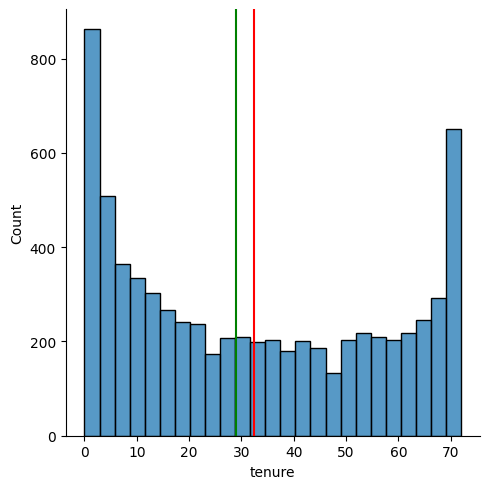

In [ ]:
plot = sns.displot(x=dataframe["tenure"], bins=25, ax=axis)
plt.axvline(x=dataframe["tenure"].mean(), color="red")
plt.axvline(x=dataframe["tenure"].median(), color="green")
plt.show()  # displaying the final figure

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


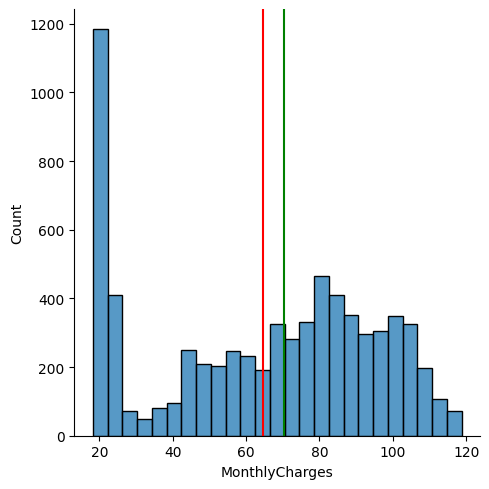

In [ ]:
plot = sns.displot(x=dataframe["MonthlyCharges"], bins=25, ax=axis)
plt.axvline(x=dataframe["MonthlyCharges"].mean(), color="red")
plt.axvline(x=dataframe["MonthlyCharges"].median(), color="green")
plt.show()  # displaying the final figure

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


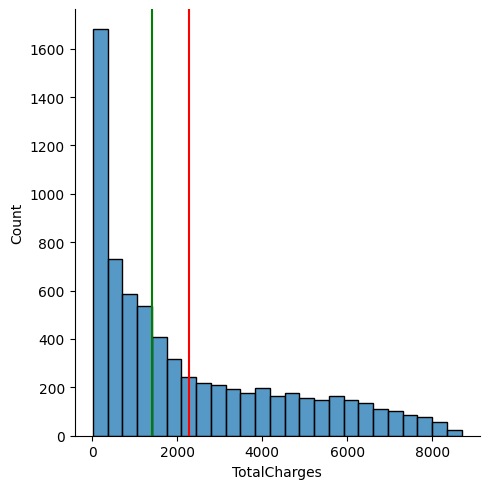

In [ ]:
plot = sns.displot(x=dataframe["TotalCharges"], bins=25, ax=axis)
plt.axvline(x=dataframe["TotalCharges"].mean(), color="red")
plt.axvline(x=dataframe["TotalCharges"].median(), color="green")
plt.show()  # displaying the final figure

We can observe that in general the charts don't follow a specifc distribution execept for the last chart that is right-skewed. 

# Build the model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

Let's start by turning our target variable from categorical to numerical.

In [ ]:
# The customer ID is irrelevant during training
dataframe = dataframe.drop(["customerID"], axis="columns")

# First converts the label column
dataframe["Churn"] = dataframe["Churn"].replace(["Yes", "No"], [1, 0])

Now let's split our dataset using 80% of the data for training and 20% for testing. Note that it's also necessary to separate the features from the label.

In [ ]:
X = dataframe.drop(["Churn"], axis="columns")
y = dataframe["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Before building the model it's also necessary to convert the remaning categorical columns to numerical. This can be done using One Hot Encoders.

In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore")
categorical_processing = Pipeline(steps=[("ohe", ohe)])
preprocessing = ColumnTransformer(transformers=[("categorical", categorical_processing,
                                                 ["gender", "Partner", "Dependents", "PhoneService",
                                                  "MultipleLines", "InternetService", "OnlineSecurity",
                                                  "OnlineBackup", "DeviceProtection", "TechSupport",
                                                  "StreamingTV", "StreamingMovies", "Contract",
                                                  "PaperlessBilling", "PaymentMethod"])],
                                  remainder="passthrough")
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

Now let's build and train the model.

In [ ]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=.02, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, n_estimators=250,
                           random_state=42)

In [ ]:
clf.score(X_test, y_test)

0.8090844570617459

This code trains only one algorithm. Other implementations for XGBoost, Logistic Regression, SVM and KNN can be found at: https://github.com/JoaoPicolo/Portfolio-CustomerChurn